In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#https://repositorio.seade.gov.br/dataset/?groups=seade-trabalho
#https://repositorio.seade.gov.br/dataset/emprego-rais-e-arquivos-auxiliares
#http://repositorio.seade.gov.br/dataset/ocupacao-e-rendimento

In [5]:
#!pip install gdown

In [6]:
#rais 2012-2020
#!gdown 1nufL8-ySHgduIe8AYXtwxK1BAkwPxdt4

In [7]:
#dicionário rais 2012-2020
#!gdown 1YelMiKISRjBikAZ1aRX4XwCFGKV1g4go

#Objetivo
Utilizar dados públicos disponibilizados pela Fundação SEADE e pelo Portal da Transparência do Estado de São Paulo para analisar a evolução do mercado de trabalho formal, ocupações e renda, aplicando modelos de séries temporais para identificar sazonalidades, impactos de políticas públicas e prever tendências.

In [9]:
# Leitura do dicionário
dic = pd.read_csv("base_rais/dicvar_rais_painel_2012a2020.csv", sep= ';', encoding='latin1')

In [10]:
# Remover todas as colunas cujo nome começa com "Unnamed"
dic = dic.loc[:, ~dic.columns.str.contains("^Unnamed")]

In [11]:
dic.head(10)

,variavel,tipo,descricao,categorias,fonte,serie_disponivel
0,ano,Número,"Ano de referência, no formato aaaa.",NaN,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020
1,cod_ibge,Número,"Código com 7 dígitos, correspondente ao código...",NaN,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020
2,cbo2002_familia,Número,Código com 4 dígitos correspondente à Família ...,NaN,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020
3,clas_cnae_20,Número,Código das categorias de Classe da CNAE versão...,NaN,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020
4,gr_instrucao,Número,Corresponde à categoria referente à escolarida...,1 - Analfabeto; 2 - Até a 5ª Incompleta; 3 - 5...,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020
5,tamestab,Número,Corresponde às categorias referente ao número ...,2 - De 1 a 4; 3 - De 5 a 9; 4 - De 10 a 19; 5 ...,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020
6,massa_rendimentos,Número,Massa de Rendimentos resultante da soma dos re...,NaN,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020
7,emprego_formal,Número,Número de empregados no ano e na localidade de...,NaN,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020
8,emp_c_sal,Número,Número de empregados no ano e na localidade de...,NaN,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020
9,escolaridade,Número,Corresponde à categoria referente à escolarida...,0 - Analfabeto; 1 - Fundamental incompleto ; 2...,Ministério do Trabalho e Emprego  MTE. Relaçã...,2012 - 2020


In [12]:
dic.categorias.unique()

array([nan,
       '1 - Analfabeto; 2 - Até a 5ª Incompleta; 3 - 5ª completo fundamental; 4 - 6ª a 9ª fundamental; 5 - Fundamental completo; 6 - Médio incompleto; 7 - Médio completo; 8 - Superior incompleto; 9 - Superior completo;10 - Mestrado;11 - Doutorado.',
       '2 - De 1 a 4; 3 - De 5 a 9; 4 - De 10 a 19; 5 - De 20 a 49; 6 - De 50 a 99; 7 - De 100 a 249; 8 - De 250 a 499; 9 - De 500 a 999; 10 - 1.000 ou mais',
       '0 - Analfabeto; 1 - Fundamental incompleto ; 2 - Fundamental completo e Médio incompleto; 3 - Médio completo ; 4 - Superior completo.'],
      dtype=object)

In [14]:
dic.descricao.unique()

array(['Ano de referência, no formato aaaa.',
       'Código com 7 dígitos, correspondente ao código IBGE do município, incluindo o dígito de controle. ',
       'Código com 4 dígitos correspondente à Família ocupacional da Classificação Brasileira de Ocupações - CBO de 2002.',
       'Código das categorias de Classe da CNAE versão 2.0',
       'Corresponde à categoria referente à escolaridade dos empregados.',
       'Corresponde às categorias referente ao número de empregados vinculados.\n',
       'Massa de Rendimentos resultante da soma dos rendimentos individuais recebidos em dezembro de cada ano.',
       'Número de empregados no ano e na localidade de referência.',
       'Número de empregados no ano e na localidade de referência que receberam salário em dezembro do ano de referência.',
       'Corresponde à categoria referente à escolaridade agregada em grupos dos empregados.'],
      dtype=object)

# Emprego e salário por setor

O tratamento estatístico das informações captadas pela Rais permite que os dados divulgados sejam desagregados em níveis de município, classe de atividade econômica e ocupação. Assim, este cadastro contém o número de empregos por gênero, faixa etária, grau de instrução e escolaridade, faixa de rendimento, rendimento médio e massa salarial, nacionalidade e, mais recentemente, raça/cor e tipo de deficiência


In [15]:
df = pd.read_csv("base_rais/Rais_2012 - 2020.csv", sep=';')

C:\Users\gusta\AppData\Local\Temp\ipykernel_57460\3597168498.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("base_rais/Rais_2012 - 2020.csv", sep=';')


In [16]:
# Converter 'massa_rendimentos' (string com vírgula) -> float
if "massa_rendimentos" in df.columns:
    df["massa_rendimentos_num"] = (
        df["massa_rendimentos"]
        .astype(str)
        .str.replace(".", "", regex=False)      # remove separador de milhar caso exista
        .str.replace(",", ".", regex=False)     # troca vírgula por ponto
        .replace({"": np.nan})
        .astype(float)
    )

In [17]:
df.head()

,ANO,Cod_ibge,CBO2002_FAMILIA,CLAS_CNAE_20,GR_INSTRUCAO,TAMESTAB,massa_rendimentos,Emprego_formal,EMP_C_SAL,Escolaridade,massa_rendimentos_num
0,2012,3500105,1210,41204,9,5,"2777,45",1,1,4,2777.45
1,2012,3500105,1210,46834,7,7,28063,1,1,3,28063.00
2,2012,3500105,1210,46834,9,7,"102849,5",2,2,4,102849.50
3,2012,3500105,1210,85317,9,8,"12558,02",2,2,4,12558.02
4,2012,3500105,1210,85414,7,3,700,1,1,3,700.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22969962 entries, 0 to 22969961
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ANO                    int64  
 1   Cod_ibge               int64  
 2   CBO2002_FAMILIA        object 
 3   CLAS_CNAE_20           int64  
 4   GR_INSTRUCAO           int64  
 5   TAMESTAB               int64  
 6   massa_rendimentos      object 
 7   Emprego_formal         int64  
 8   EMP_C_SAL              int64  
 9   Escolaridade           int64  
 10  massa_rendimentos_num  float64
dtypes: float64(1), int64(8), object(2)
memory usage: 1.9+ GB


## Diminuir a granularidade dos empregos para seção

por meio do código relacionar com industria, serviço, serviços de adm_publica

In [12]:
#df.CLAS_CNAE_20.unique()

In [19]:
# gerar código completo : se tiver 4 dígitos, acrescentar um 0 no inicio
df['CLAS_CNAE_20'] = df['CLAS_CNAE_20'].astype(str).str.zfill(5)

In [14]:
#df.CLAS_CNAE_20.unique()

seção é demarcada por : https://concla.ibge.gov.br/busca-online-cnae.html?view=estrutura

In [20]:
df['divisao_cnae'] = df['CLAS_CNAE_20'].astype(str).str[:2].astype(int)

# Função para mapear a divisão para o setor
def mapear_setor(div):
    if 1 <= div <= 3:
        return 'Agropecuária'
    elif 5 <= div <= 9:
        return 'Indústrias Extrativas'
    elif 10 <= div <= 33:
        return 'Indústria de Transformação'
    elif div == 35:
        return 'Eletricidade e Gás'
    elif 36 <= div <= 39:
        return 'Saneamento e Resíduos'
    elif 41 <= div <= 43:
        return 'Construção'
    elif 45 <= div <= 47:
        return 'Comércio'
    elif 49 <= div <= 53:
        return 'Transporte e Correios'
    elif 55 <= div <= 56:
        return 'Alojamento e Alimentação'
    elif 58 <= div <= 63:
        return 'Informação e Comunicação'
    elif 64 <= div <= 66:
        return 'Serviços Financeiros'
    elif div == 68:
        return 'Atividades Imobiliárias'
    elif 69 <= div <= 75:
        return 'Atividades Profissionais e Técnicas'
    elif 77 <= div <= 82:
        return 'Serviços Administrativos'
    elif div == 84:
        return 'Administração Pública'
    elif div == 85:
        return 'Educação'
    elif 86 <= div <= 88:
        return 'Saúde'
    elif 90 <= div <= 93:
        return 'Artes e Cultura'
    elif 94 <= div <= 96:
        return 'Outros Serviços'
    elif div == 97:
        return 'Serviços Domésticos'
    elif div == 99:
        return 'Organismos Internacionais'
    else:
        return 'Desconhecido'

# Aplicando a função
df['secao_cnae'] = df['divisao_cnae'].apply(mapear_setor)


In [21]:
df.columns = df.columns.str.lower()

## Explorar

In [22]:
df.columns

Index(['ano', 'cod_ibge', 'cbo2002_familia', 'clas_cnae_20', 'gr_instrucao',
       'tamestab', 'massa_rendimentos', 'emprego_formal', 'emp_c_sal',
       'escolaridade', 'massa_rendimentos_num', 'divisao_cnae', 'secao_cnae'],
      dtype='object')

In [23]:
df_rendimento_emprego = df.groupby(['ano', 'cod_ibge', 'secao_cnae']).agg({'massa_rendimentos_num': 'sum', 'emprego_formal': 'sum','emp_c_sal': 'sum'}).reset_index()

In [24]:
df_rendimento_emprego['rendimento_medio_c_sal'] = df_rendimento_emprego['massa_rendimentos_num'] / df_rendimento_emprego['emp_c_sal']

In [25]:
df_rendimento_emprego.sort_values(by = 'rendimento_medio_c_sal', ascending=False).head(20)

,ano,cod_ibge,secao_cnae,massa_rendimentos_num,emprego_formal,emp_c_sal,rendimento_medio_c_sal
39609,2015,3552809,Eletricidade e Gás,52266.16,2,2,26133.080000
29437,2014,3552809,Eletricidade e Gás,49201.73,2,2,24600.865000
19305,2013,3552809,Eletricidade e Gás,46608.88,2,2,23304.440000
9188,2012,3552809,Eletricidade e Gás,43388.99,2,2,21694.495000
34225,2015,3521705,Eletricidade e Gás,193449.43,9,9,21494.381111
79482,2019,3548500,Indústrias Extrativas,21988730.53,2846,1036,21224.643369
69312,2018,3548500,Indústrias Extrativas,54063764.31,2629,2574,21003.793438
44393,2016,3521705,Eletricidade e Gás,187379.68,9,9,20819.964444
59146,2017,3548500,Indústrias Extrativas,54020869.57,2680,2629,20548.067543
89679,2020,3548500,Indústrias Extrativas,57042058.64,2906,2844,20056.982644


In [26]:
df_rendimento_emprego.sort_values(by = 'rendimento_medio_c_sal', ascending=True).head(20)

,ano,cod_ibge,secao_cnae,massa_rendimentos_num,emprego_formal,emp_c_sal,rendimento_medio_c_sal
1254,2012,3507209,Alojamento e Alimentação,187.93,1,1,187.93
9452,2012,3554201,Saúde,212.84,1,1,212.84
30831,2015,3503109,Informação e Comunicação,274.08,1,1,274.08
7413,2012,3542305,Educação,281.88,1,1,281.88
18812,2013,3550001,Artes e Cultura,286.37,1,1,286.37
29575,2014,3553658,Construção,300.00,1,1,300.00
69803,2018,3551306,Saúde,300.00,1,1,300.00
23607,2014,3519204,Educação,301.96,2,1,301.96
51171,2017,3503109,Informação e Comunicação,306.24,1,1,306.24
48536,2016,3545704,Atividades Imobiliárias,309.15,1,1,309.15


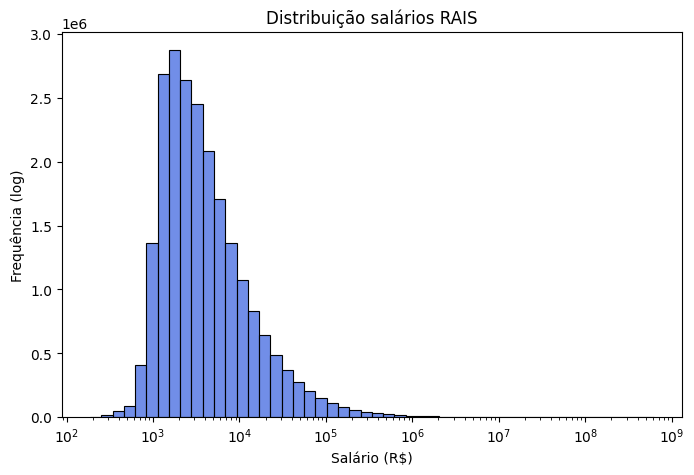

In [27]:
# Distribuição de salários (massa de rendimentos)
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="massa_rendimentos_num",
    bins=50,
    log_scale=True,   # eixo Y em escala log
    color="royalblue"
)
plt.title("Distribuição salários RAIS")
plt.xlabel("Salário (R$)")
plt.ylabel("Frequência (log)")
plt.show()

In [28]:
# Top 10 setores (CNAE_secao) por número de vínculos
print(df["secao_cnae"].value_counts().head(10))

secao_cnae
Comércio                      5957203
Indústria de Transformação    5945131
Serviços Administrativos      1488997
Construção                    1279461
Transporte e Correios         1030794
Agropecuária                   893700
Educação                       872360
Saúde                          854949
Outros Serviços                824416
Alojamento e Alimentação       781020
Name: count, dtype: int64


## Relacionar fatores economicos no RAIS

PIB, inflação, por enquanto

carregando inflação

In [29]:
#!gdown 1Bkpci0JLcsEnlszv_xWrG61xzx55jxNH

In [ ]:
#!pip install openpyxl

In [30]:
df_inflacao = pd.read_excel('IPCA_setor/ipca_setor_anualizado.xlsx')

In [31]:
df_inflacao.head(1)

,ano,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral
0,2012,9.862794,0.846219,0.759539,10.156268,7.792614,6.811951,5.943856,0.374033,5.800558,5.838569


In [32]:
df_inflacao = df_inflacao[(df_inflacao['ano'] >= 2012) & (df_inflacao['ano'] <= 2020) ]

In [33]:
df_inflacao.info()
df_inflacao.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ano                           9 non-null      int64  
 1   ipca_alimentos_bebidas        9 non-null      float64
 2   ipca_artigos_residencia       9 non-null      float64
 3   ipca_comunicacao              9 non-null      float64
 4   ipca_despesas_pessoais        9 non-null      float64
 5   ipca_educacao                 9 non-null      float64
 6   ipca_habitacao                9 non-null      float64
 7   ipca_saude_cuidados_pessoais  9 non-null      float64
 8   ipca_transportes              9 non-null      float64
 9   ipca_vestuario                9 non-null      float64
 10  ipca_geral                    9 non-null      float64
dtypes: float64(10), int64(1)
memory usage: 924.0 bytes


,ano,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral
0,2012,9.862794,0.846219,0.759539,10.156268,7.792614,6.811951,5.943856,0.374033,5.800558,5.838569
1,2013,8.477348,7.116327,1.506580,8.398714,7.922577,3.409809,6.947191,3.295580,5.373638,5.910818
2,2014,8.031129,5.496404,-1.509972,8.305893,8.452358,8.803604,6.970412,3.758790,3.649534,6.407617
3,2015,12.008131,5.382886,2.096074,9.510231,9.248743,18.336453,9.202803,10.167379,4.469602,10.673498
4,2016,8.610738,3.412772,1.270565,8.009707,8.865806,2.839685,11.045369,4.236124,3.539347,6.288055


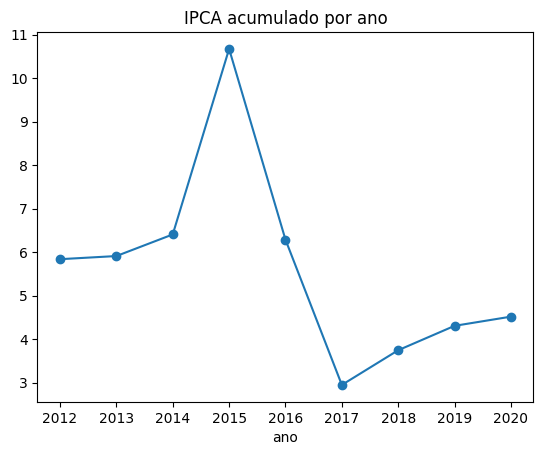

In [35]:
df_inflacao.set_index("ano")["ipca_geral"].plot(marker="o", title="IPCA acumulado por ano")
plt.show()

Carregando PIB

In [37]:
#!gdown 1MDZ4LdpIy6fa5IihxUp0btoOMYArZnU4

In [38]:
df_pib = pd.read_excel('PIB/pib.xlsx')

In [39]:
df_pib = df_pib[(df_pib['ano'] >= 2012) & (df_pib['ano'] <= 2020) ]

In [40]:
df_pib.info()
df_pib.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5805 entries, 10 to 12254
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cod_ibge              5805 non-null   int64 
 1   localidade            5805 non-null   object
 2   ano                   5805 non-null   int64 
 3   agropecuaria          5805 non-null   int64 
 4   impostos_liq_sub      5805 non-null   int64 
 5   industria             5805 non-null   int64 
 6   pib                   5805 non-null   int64 
 7   servicos              5805 non-null   int64 
 8   servicos_adm_publica  5805 non-null   int64 
 9   valor_add             5805 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 498.9+ KB


,cod_ibge,localidade,ano,agropecuaria,impostos_liq_sub,industria,pib,servicos,servicos_adm_publica,valor_add
10,3500105,Adamantina,2012,38489908,62842352,114027855,743683942,421933183,106390645,680841590
11,3500105,Adamantina,2013,42724447,65448614,109703205,815579342,474748989,122954088,750130729
12,3500105,Adamantina,2014,36676315,63577528,110761270,862888665,517361503,134512050,799311137
13,3500105,Adamantina,2015,35561201,69638632,268213546,1059096842,540799992,144883471,989458210
14,3500105,Adamantina,2016,41846000,72693082,129807378,979975651,584588161,151041030,907282569


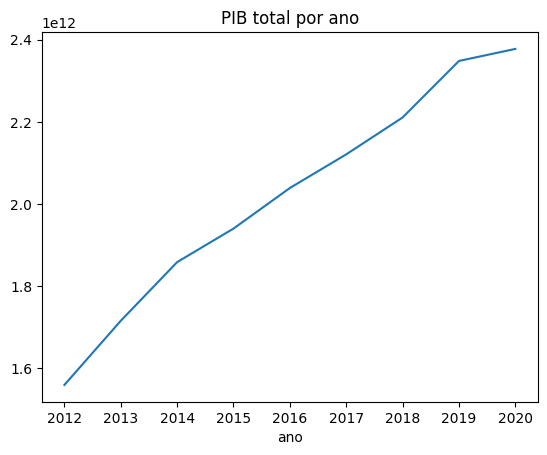

In [41]:
# Evolução do PIB agregado por ano
df_pib.groupby("ano")["pib"].sum().plot(title="PIB total por ano")
plt.show()

In [42]:
#verificar se o codigo_ibge está condizente
cod_pib = df_pib.cod_ibge.unique()
cod_emp = df.cod_ibge.unique()
list(set(cod_emp) - set(cod_pib))

[]

Join entre as bases

In [45]:
# RAIS
if "ANO" in df.columns:
    df = df.rename(columns={"ANO":"ano"})
if "Cod_ibge" in df.columns:
    df = df.rename(columns={"Cod_ibge":"cod_ibge"})

df["ano"] = df["ano"].astype("int64", errors="ignore")
if "cod_ibge" in df.columns:
    df["cod_ibge"] = df["cod_ibge"].astype("int64", errors="ignore")

In [43]:
# PIB (municipal)
df_pib = df_pib.rename(columns=str.lower)  # garante: 'ano', 'cod_ibge', ...
df_pib["ano"] = df_pib["ano"].astype("int64")
df_pib["cod_ibge"] = df_pib["cod_ibge"].astype("int64")


In [44]:
# Inflação (nacional por ano)
df_inflacao = df_inflacao.rename(columns=str.lower)  # garante: 'ano', 'ipca_acumulado'
df_inflacao["ano"] = df_inflacao["ano"].astype("int64")

In [46]:
# Sanidade das chaves 
# PIB deve ser 1 linha por (ano, cod_ibge)
dup_pib = df_pib.duplicated(subset=["ano","cod_ibge"]).sum()
print(f"[check] Duplicatas em df_pib por (ano,cod_ibge): {dup_pib}")

# Inflação deve ser 1 linha por ano
dup_inf = df_inflacao.duplicated(subset=["ano"]).sum()
print(f"[check] Duplicatas em df_inflacao por ano: {dup_inf}")

[check] Duplicatas em df_pib por (ano,cod_ibge): 0
[check] Duplicatas em df_inflacao por ano: 0


In [47]:
# Merge RAIS + PIB por (ano, cod_ibge) 
pib_cols = [c for c in df_pib.columns if c not in ("ano","cod_ibge","localidade")]
df_pib_pref = df_pib[["ano","cod_ibge"] + pib_cols].copy()
df_pib_pref = df_pib_pref.rename(columns={c: f"pib_{c}" for c in pib_cols})

df_rais_pib = df.merge(df_pib_pref, on=["ano","cod_ibge"], how="left", validate="m:1")
print(f"[merge] df_rais_pib: {df_rais_pib.shape}")


[merge] df_rais_pib: (22969962, 20)


In [39]:
#  Merge com inflação (ano) 
df_rais_pib_inf = df_rais_pib.merge(df_inflacao, on="ano", how="left", validate="m:1")
print(f"[merge] df_rais_pib_inf: {df_rais_pib_inf.shape}")

[merge] df_rais_pib_inf: (22969962, 21)


In [40]:
# Checagens rápidas de cobertura 
tot = len(df)
cov_pib = df_rais_pib["pib_pib"].notna().mean() if "pib_pib" in df_rais_pib.columns else float("nan")
cov_ipca = df_rais_pib_inf["ipca_acumulado"].notna().mean() if "ipca_acumulado" in df_rais_pib_inf.columns else float("nan")
print(f"[cov] Cobertura PIB: {cov_pib:.1%} | Cobertura IPCA: {cov_ipca:.1%}")

[cov] Cobertura PIB: 100.0% | Cobertura IPCA: 100.0%


In [41]:
# Amostra de colunas resultantes
preview_cols = ["ano","cod_ibge","ipca_acumulado"]
preview_cols += [c for c in df_rais_pib_inf.columns if c.startswith("pib_")][:6]  # primeiras 6 do PIB
print(df_rais_pib_inf[preview_cols].head())

    ano  cod_ibge  ipca_acumulado  pib_agropecuaria  pib_impostos_liq_sub  \
0  2012   3500105            5.84          38489908              62842352   
1  2012   3500105            5.84          38489908              62842352   
2  2012   3500105            5.84          38489908              62842352   
3  2012   3500105            5.84          38489908              62842352   
4  2012   3500105            5.84          38489908              62842352   

   pib_industria    pib_pib  pib_servicos  pib_servicos_adm_publica  
0      114027855  743683942     421933183                 106390645  
1      114027855  743683942     421933183                 106390645  
2      114027855  743683942     421933183                 106390645  
3      114027855  743683942     421933183                 106390645  
4      114027855  743683942     421933183                 106390645  


In [42]:
df_merged = df_rais_pib_inf.copy()

In [43]:
df_merged.isna().mean().sort_values(ascending=False).head(10)


ano                  0.0
cod_ibge             0.0
cbo2002_familia      0.0
clas_cnae_20         0.0
gr_instrucao         0.0
tamestab             0.0
massa_rendimentos    0.0
emprego_formal       0.0
emp_c_sal            0.0
escolaridade         0.0
dtype: float64

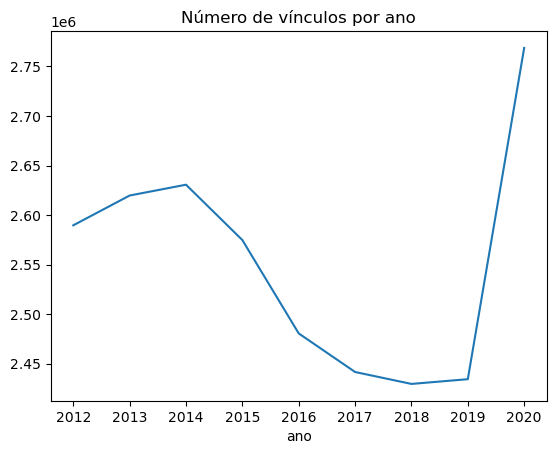

In [44]:
# Número de vínculos por ano
df_merged.groupby("ano")["cod_ibge"].count().plot(title="Número de vínculos por ano")
plt.show()

## Agregar informações do Cadunico